<a href="https://colab.research.google.com/github/lurivasm/1000House/blob/master/fourier_vs_wavelets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

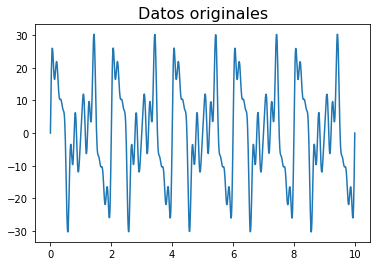

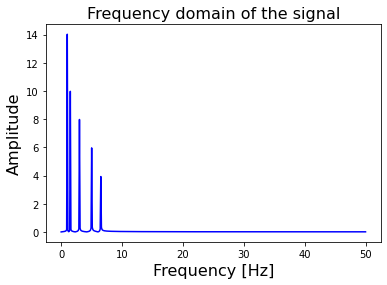

In [14]:
from scipy.fftpack import fft
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt

t_n = 10      #
N = 1000      # numero de puntos
T = t_n / N   # periodo 1/100 = 0.01 seg
f_s = 1/T     # frecuencia 100 hz


def get_fft_values(y_values, T, N, f_s):
    f_values = np.linspace(0.0, 1.0/(2.0*T), N//2)    # del 0 al 50 y queremos 500 ejemplos
    fft_values_ = fft(y_values)                       # devuelve un vector con las frecuencias imaginarias de y
                                                      # la parte real es la amplitud y la imaginaria la fase de la señal
    fft_values = 2.0/N * np.abs(fft_values_[0:N//2])  # solo queremos la amplitud y N/2 puntos, la otra mitad no es útil
    return f_values, fft_values
 
# Definimos las x
x_value = np.linspace(0,t_n,N)
amplitudes = [4, 6, 8, 10, 14]
frequencies = [6.5, 5, 3, 1.5, 1]
y_values = [amplitudes[ii]*np.sin(2*np.pi*frequencies[ii]*x_value) for ii in range(0,len(amplitudes))]
# La y es una suma de distintas funciones
y = np.sum(y_values, axis=0)

# Datos originlales
plt.plot(x_value, y)
plt.title("Datos originales", fontsize=16)
plt.show()

f_values, fft_values = get_fft_values(y, T, N, f_s)
 
# Esta es la FFT
# la frecuencia es 100 luego la FFT devuelve un espectro de 50hz
plt.plot(f_values, fft_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]', fontsize=16)
plt.ylabel('Amplitude', fontsize=16)
plt.title("Frequency domain of the signal", fontsize=16)
plt.show()

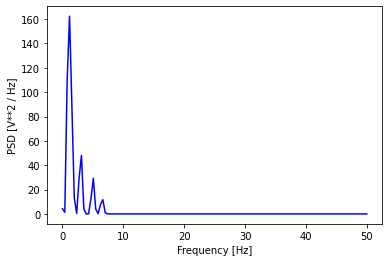

In [15]:
from scipy.signal import welch

def get_psd_values(y_values, T, N, f_s):
    f_values, psd_values = welch(y_values, fs=f_s)
    return f_values, psd_values

f_values, psd_values = get_psd_values(y, T, N, f_s)

plt.plot(f_values, psd_values, linestyle='-', color='blue')
plt.xlabel('Frequency [Hz]')
plt.ylabel('PSD [V**2 / Hz]')
plt.show()

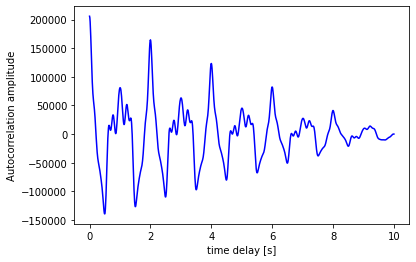

In [16]:
def autocorr(x):
    result = np.correlate(x, x, mode='full')
    return result[len(result)//2:]
 
def get_autocorr_values(y_values, T, N, f_s):
    autocorr_values = autocorr(y_values)
    x_values = np.array([T * jj for jj in range(0, N)])
    return x_values, autocorr_values
 
t_n = 10
N = 1000
T = t_n / N
f_s = 1/T
 
t_values, autocorr_values = get_autocorr_values(y, T, N, f_s)
 
plt.plot(t_values, autocorr_values, linestyle='-', color='blue')
plt.xlabel('time delay [s]')
plt.ylabel('Autocorrelation amplitude')
plt.show()